Improvement (visualization) for the [notebook](https://www.kaggle.com/code/namanmanchanda/heart-attack-eda-prediction-90-accuracy). If you liked the report, I will be glad to get you a vote❤️)

# Data Dictionary
* `age` - Age of the patient
* `sex` - Sex of the patient
* `cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
* `trtbps` - Resting blood pressure (in mm Hg)
* `chol` - Cholestoral in mg/dl fetched via BMI sensor
* `fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
* `restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
* `thalachh` - Maximum heart rate achieved
* `oldpeak` - Previous peak
* `slp` - Slope
* `caa` - Number of major vessels
* `thall` - Thalium Stress Test result ~ (0,3)
* `exng` - Exercise induced angina ~ 1 = Yes, 0 = No
* `output` - Target variable

# Packages

In [55]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [56]:
data = pd.read_csv("../data/heart.csv")

data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

## Univariate Analysis

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [58]:
d = {}

for column_name in data:
    d[column_name] = data[column_name].value_counts().shape[0]
    
pd.DataFrame(d.values(), index=d.keys(), columns=["n_unique"]).T

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
n_unique,41,2,4,49,152,2,3,91,2,40,3,5,4,2


In [59]:
categorical_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]
target_feature = "output"

print("Categorial features : ", categorical_features)
print("Continuous features : ", continuous_features)
print("Target feature      : ", target_feature)

Categorial features :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
Continuous features :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Target feature      :  output


In [60]:
import warnings


def print_title(title_ax, *, text):
    title_ax.axis(False)
    title_ax.text(0.5, 0.5,
                  text + '\n ____________',
                  horizontalalignment='center',
                  verticalalignment='center',
                  fontsize=18, fontweight='bold',
                  fontfamily='serif',
                  color="#000000")


def get_countplots(data, categorical_features, max_unique_values=10,
                   color_palette="Set1", background_color="#ffffff"):
    rejected_features = [column_name for column_name in categorical_features if
                         data[column_name].nunique() > max_unique_values]
    if rejected_features:
        warnings.warn(f"Rejected features (n_unique values > {max_unique_values}): {rejected_features}")

    selected_categorical_features = [feature for feature in categorical_features if feature not in rejected_features]

    n_subplots = len(selected_categorical_features) + 1
    n_cols = 3
    n_rows = (n_subplots + n_cols - 1) // n_cols
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
    axs = axs.flatten()

    fig.patch.set_facecolor(background_color)

    for selected_feature, ax in zip(selected_categorical_features, axs[1:]):
        sns.countplot(ax=ax, data=data, x=selected_feature, palette=color_palette, edgecolor="black", linewidth=0.5)
        ax.set_facecolor(background_color)
        ax.set_title(selected_feature, fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
        ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.spines[["top", "right", "left"]].set_visible(False)

    for i in range(len(selected_categorical_features) + 1, len(axs)):
        axs[i].axis(False)

    print_title(axs[0], text='Count plot\nfor categorical features')

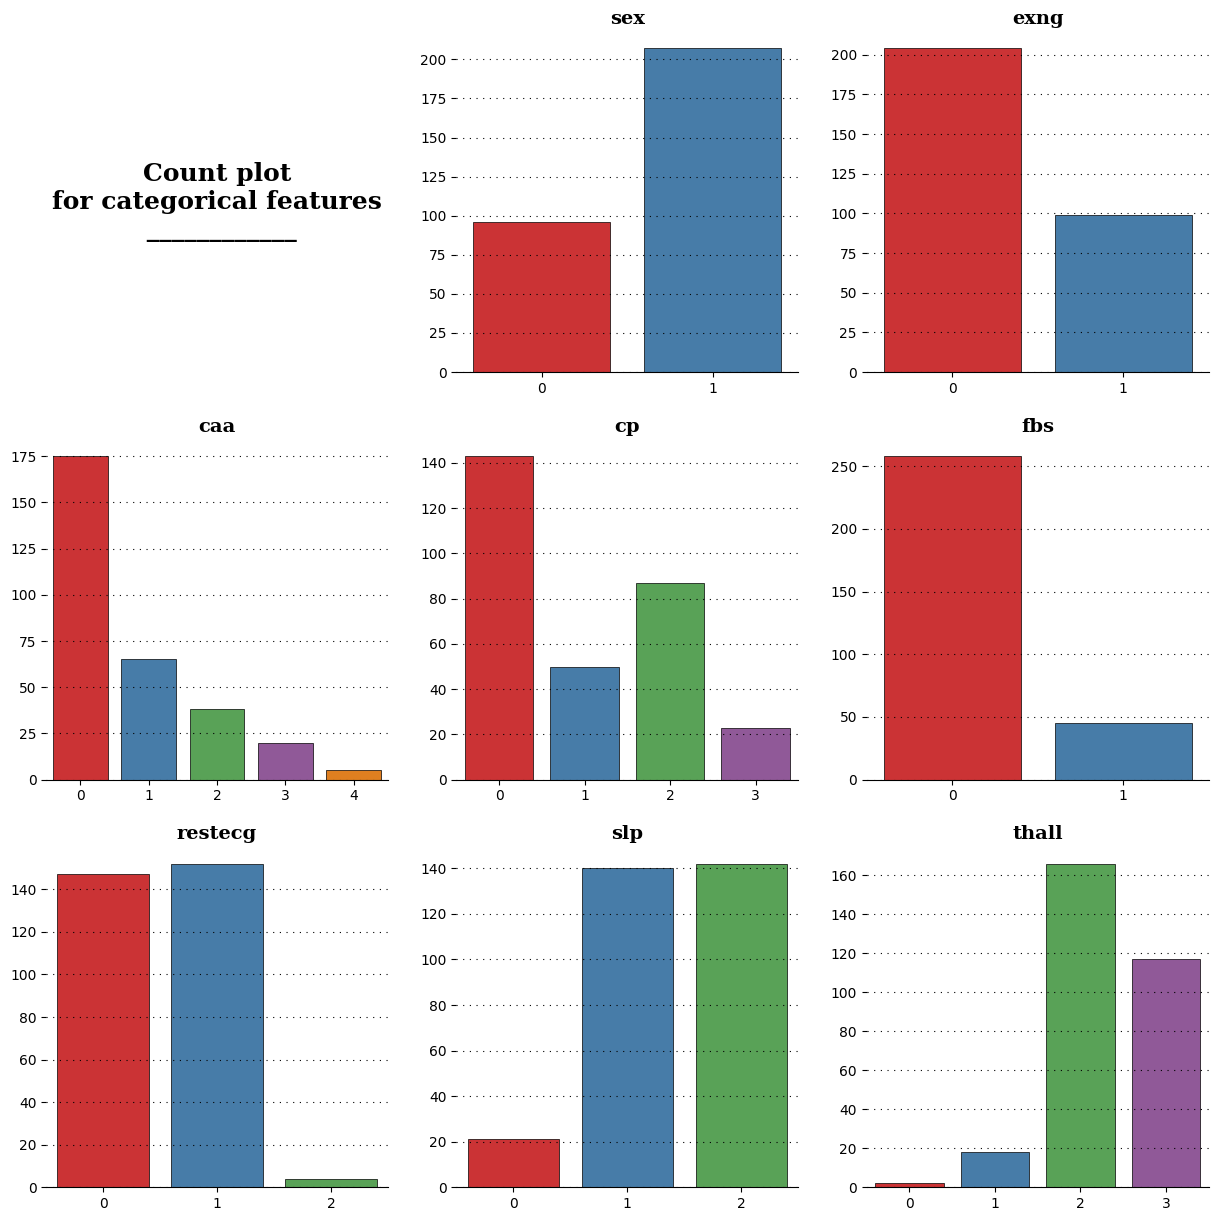

In [61]:
get_countplots(data, categorical_features, max_unique_values=6)

In [62]:
def get_boxenplots(data, continuous_variables,
                   color_palette="Set1", background_color="#ffffff"):
    n_subplots = len(continuous_variables) + 1
    n_cols = 3
    n_rows = (n_subplots + n_cols - 1) // n_cols
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
    axs = axs.flatten()

    fig.patch.set_facecolor(background_color)

    for continuous_variable, ax in zip(continuous_variables, axs[1:]):
        sns.boxenplot(ax=ax, data=data, y=continuous_variable, palette=color_palette)
        ax.set_facecolor(background_color)
        ax.set_title(continuous_variable, fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
        ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.spines[["top", "right", "left", "bottom"]].set_visible(False)

    for i in range(len(continuous_variables) + 1, len(axs)):
        axs[i].axis(False)

    print_title(axs[0], text='Boxen plot\nfor continuous features')

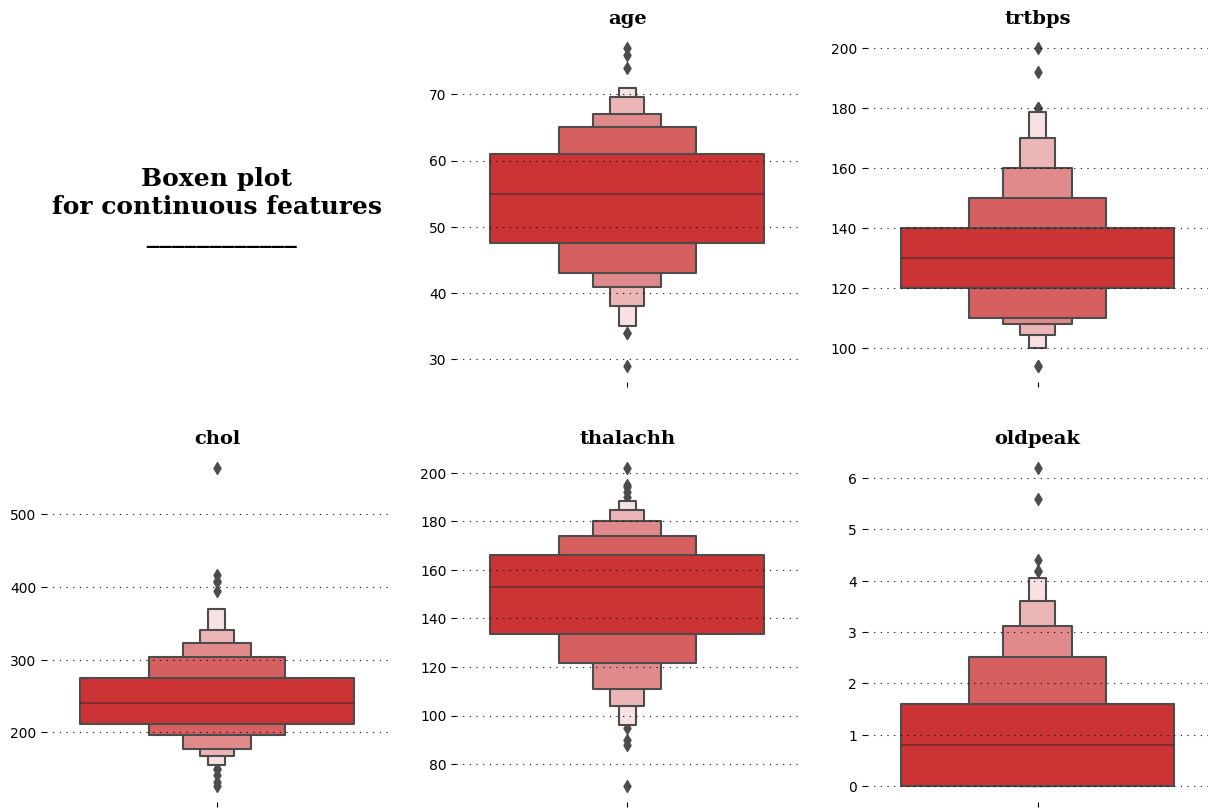

In [63]:
get_boxenplots(data, continuous_features)

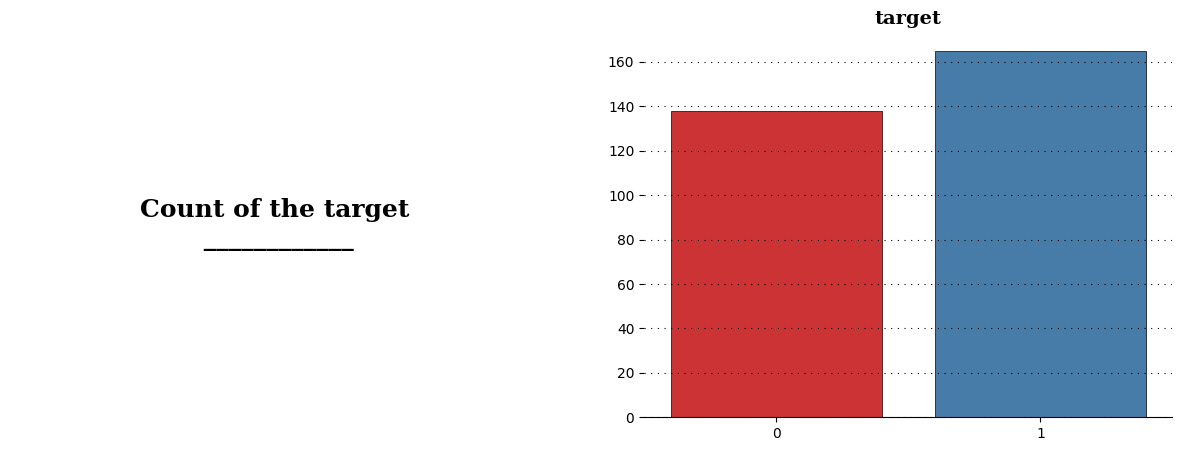

In [64]:
def get_targetplot(data, target,
                   color_palette="Set1", background_color="#ffffff"):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axs = axs.flatten()

    fig.patch.set_facecolor(background_color)

    sns.countplot(ax=axs[1], data=data, x=data[target], palette=color_palette, edgecolor="black", linewidth=0.5)
    axs[1].set_facecolor(background_color)
    axs[1].set_title("target", fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
    axs[1].grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    axs[1].set_xlabel("")
    axs[1].set_ylabel("")
    axs[1].spines[["top", "right", "left"]].set_visible(False)

    print_title(axs[0], text='Count of the target')


get_targetplot(data, target_feature)

## Bivariate Analysis

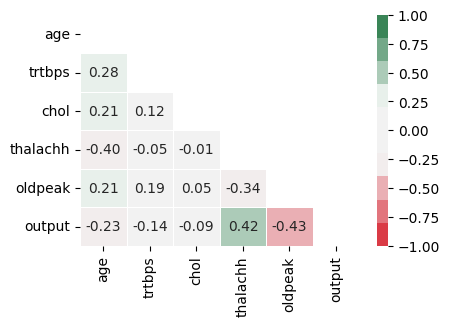

In [65]:
def get_corr_plot(df_or_corrmatrix):
    nrows, ncols = df_or_corrmatrix.shape
    if nrows != ncols:
        corr_matrix = df_or_corrmatrix.select_dtypes(include=np.number).corr()
    else:
        corr_matrix = df_or_corrmatrix

    cmap = sns.diverging_palette(10, 140, sep=80, n=10)
    height_per_column = 1 / 2
    width_per_column = 3 / 4
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(width_per_column * len(corr_matrix), height_per_column * len(corr_matrix)))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, mask=mask, annot=True, fmt=".2f", linewidths=.5, cmap=cmap)
    plt.yticks(rotation=0, ha='right')
    plt.show()

    
get_corr_plot(data[continuous_features + [target_feature]])

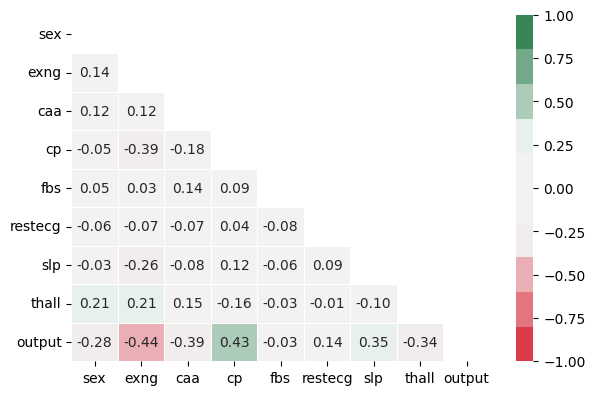

In [66]:
get_corr_plot(data[categorical_features + [target_feature]])

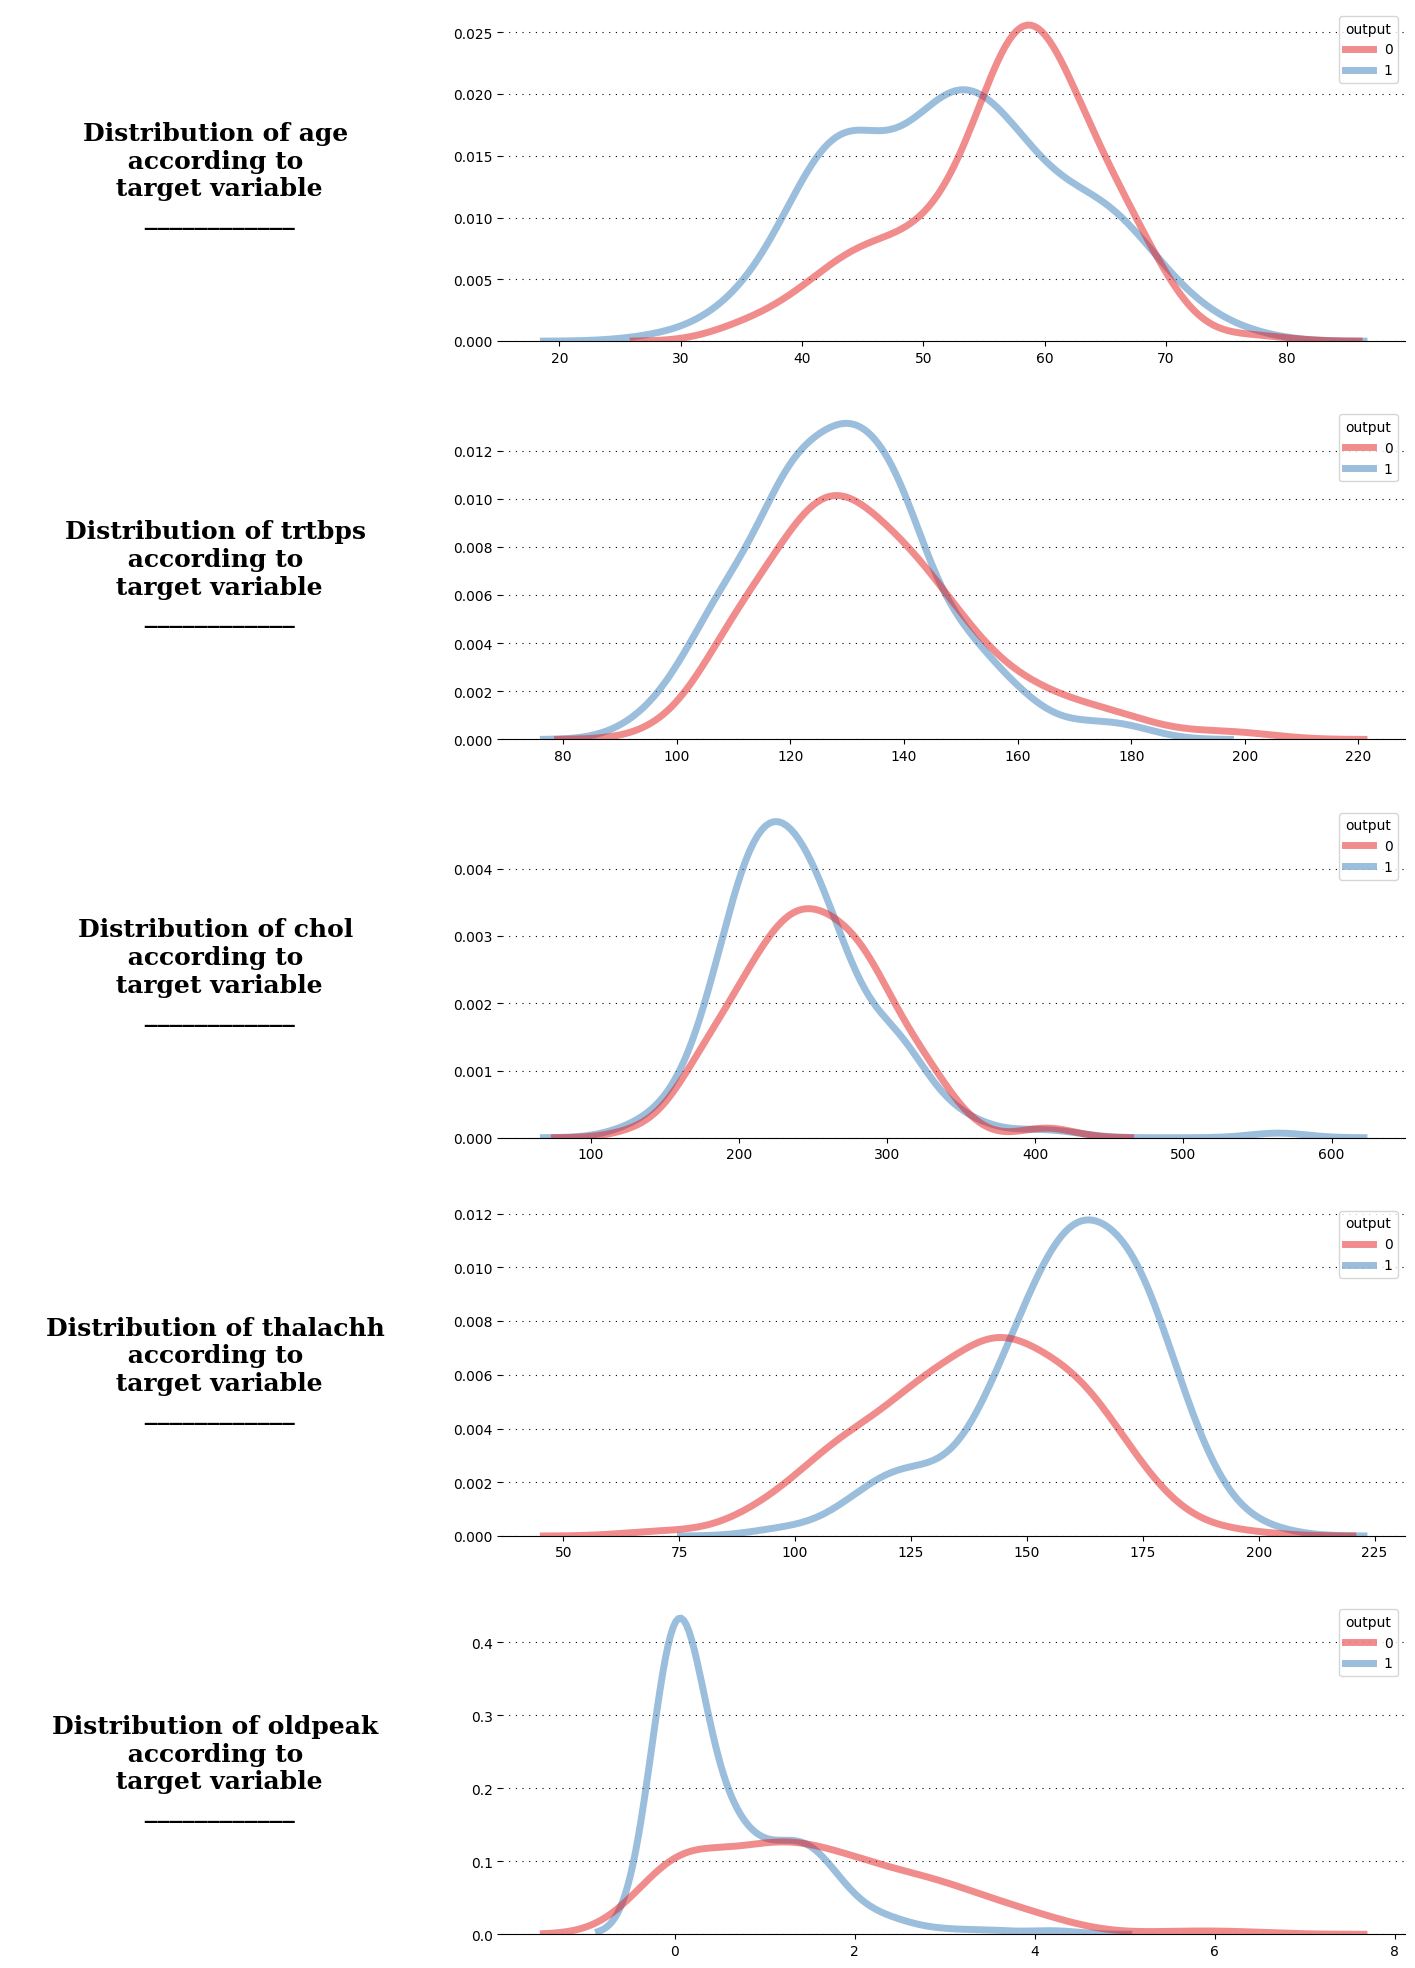

In [67]:
def get_distribution_of_continuous_features_according_to_target_variable(
                   data, continuous_variables,
                   target_variable,
                   color_palette="Set1", background_color="#ffffff"):
    fig = plt.figure(figsize=(18, len(continuous_variables) * 5))
    gs = fig.add_gridspec(len(continuous_variables), 3)

    fig.patch.set_facecolor(background_color)

    for i, continuous_variable in enumerate(continuous_variables):
        ax_title = fig.add_subplot(gs[i, 0])
        ax_plot = fig.add_subplot(gs[i, 1:])
        
        print_title(ax_title, 
                    text=f'Distribution of {continuous_variable}\n according to \n target variable')
        sns.kdeplot(ax=ax_plot, 
                    data=data, x=continuous_variable, 
                    hue=target_variable, palette=color_palette, 
                    alpha=.5, linewidth=5)
        ax_plot.set_facecolor(background_color)
        ax_plot.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
        ax_plot.set_xlabel("")
        ax_plot.set_ylabel("")
        ax_plot.spines[["top", "right", "left"]].set_visible(False)


get_distribution_of_continuous_features_according_to_target_variable(data, continuous_features, target_feature)

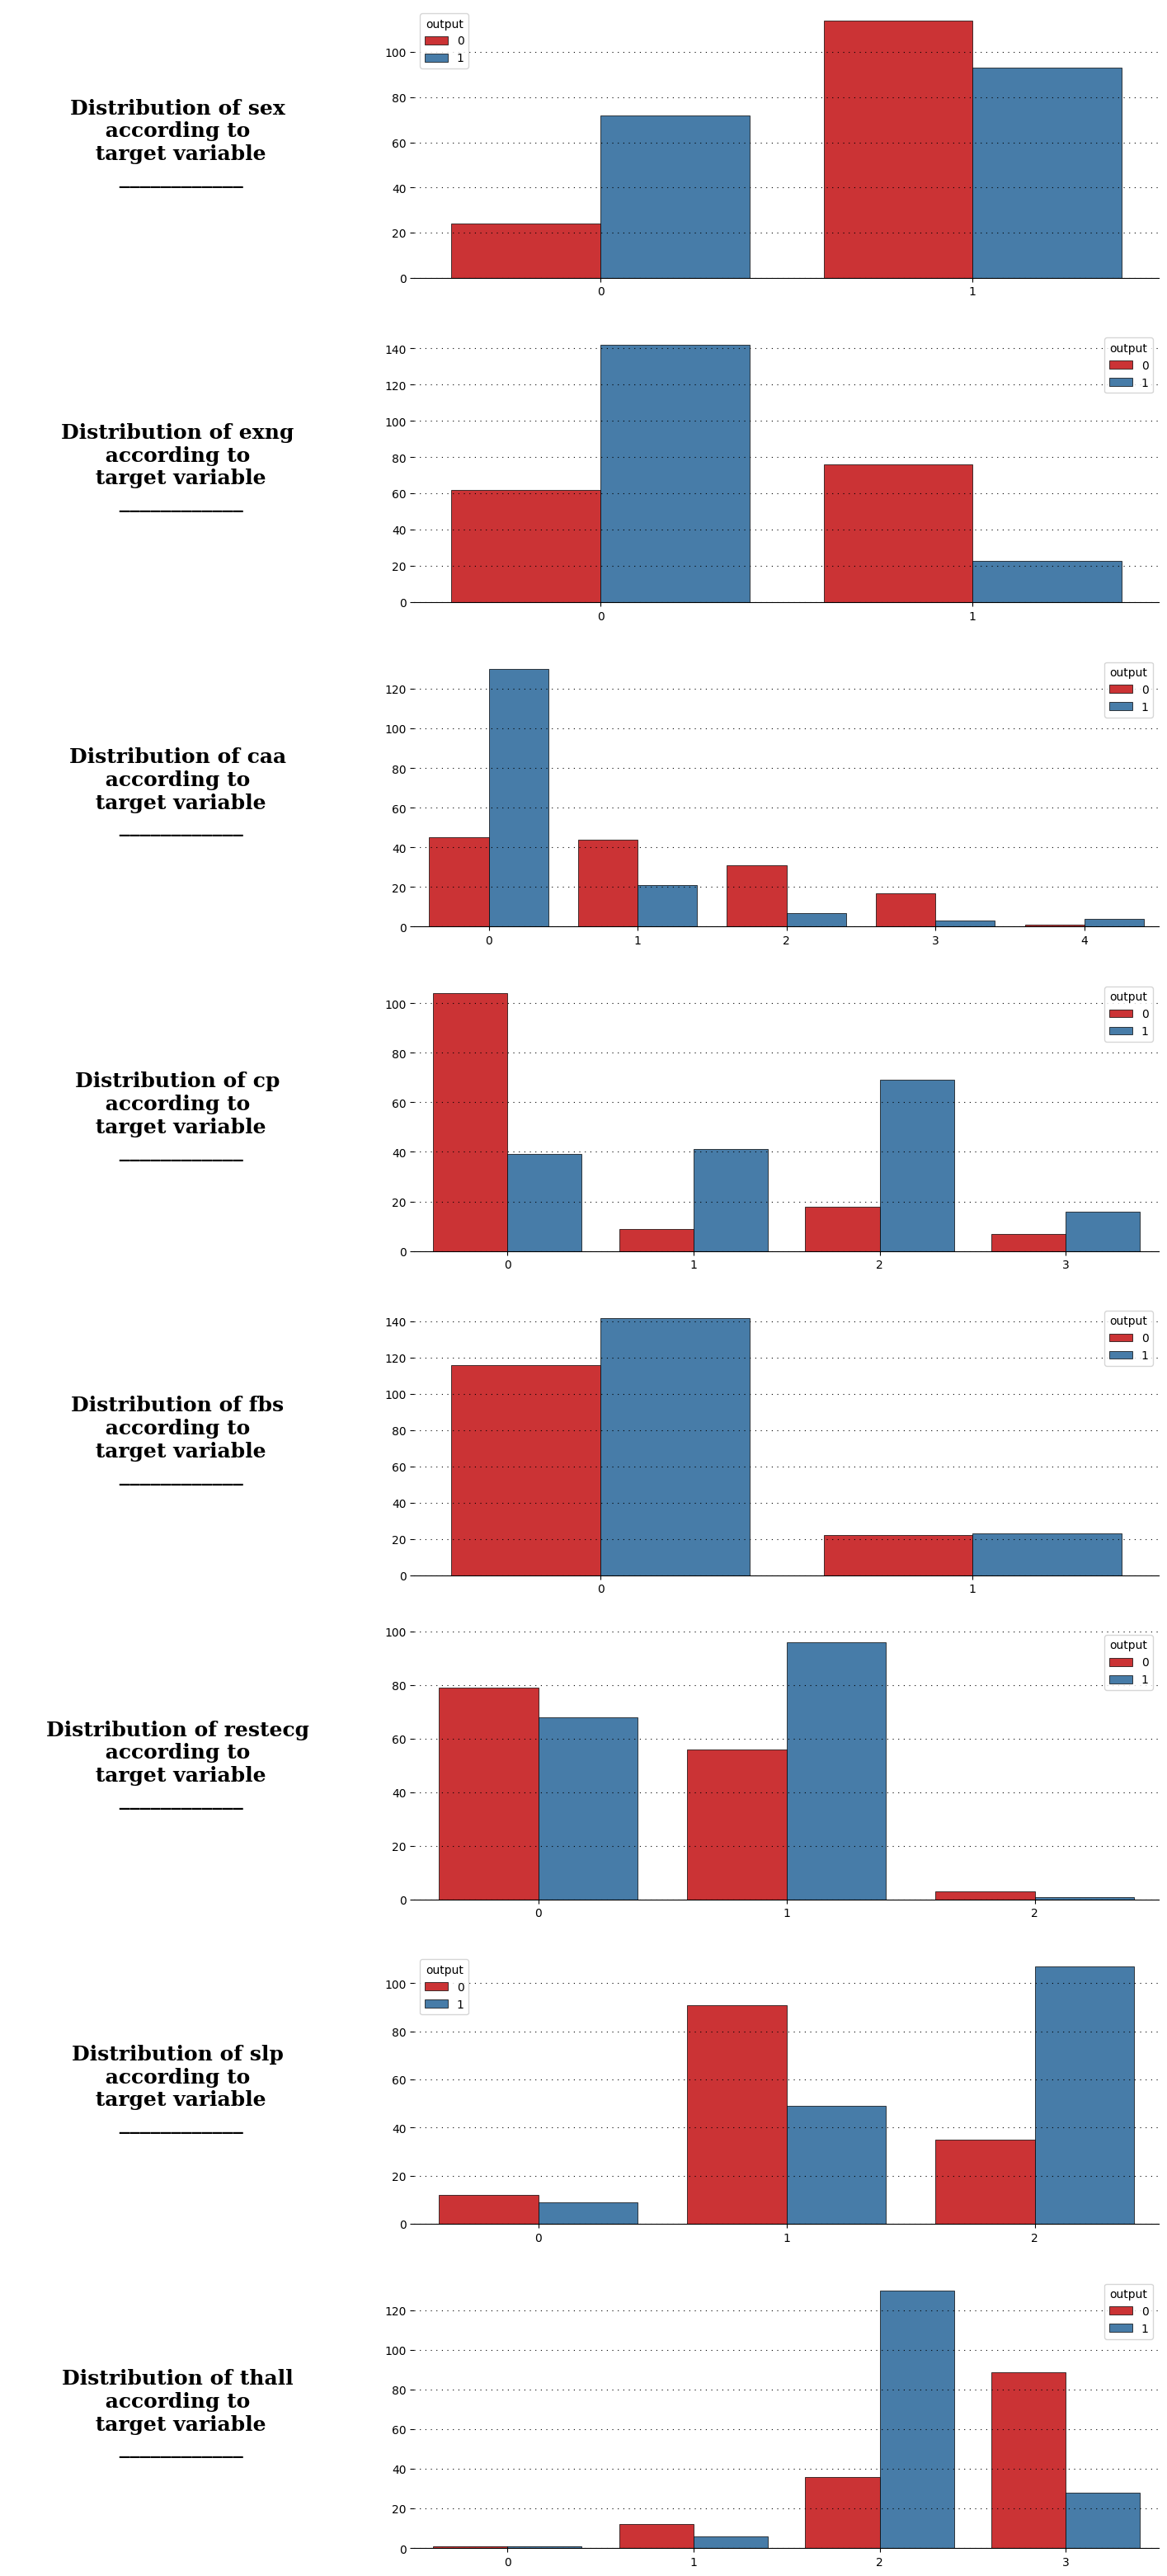

In [68]:
def get_distribution_of_categorical_features_according_to_target_variable(
                   data, categorical_variables,
                   target_variable,
                   color_palette="Set1", background_color="#ffffff"):
    fig = plt.figure(figsize=(18, len(categorical_variables) * 5))
    gs = fig.add_gridspec(len(categorical_variables), 3)

    fig.patch.set_facecolor(background_color)

    for i, categorical_variable in enumerate(categorical_variables):
        ax_title = fig.add_subplot(gs[i, 0])
        ax_plot = fig.add_subplot(gs[i, 1:])
        
        print_title(ax_title, 
                    text=f'Distribution of {categorical_variable}\n according to \n target variable')
        
        sns.countplot(ax=ax_plot, data=data, x=data[categorical_variable], 
                      hue=target_variable, palette=color_palette, edgecolor="black", linewidth=0.5)
        ax_plot.set_facecolor(background_color)
        ax_plot.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
        ax_plot.set_xlabel("")
        ax_plot.set_ylabel("")
        ax_plot.spines[["top", "right", "left"]].set_visible(False)


get_distribution_of_categorical_features_according_to_target_variable(data, categorical_features, target_feature)

## Conclusions
1. There are no NaN values in the data.
2. There are certain outliers in all the continuous features.
3. The data consists of more than twice the number of people with `sex = 1` than `sex = 0`.
4. The correlation matrix suggests that there might be some correlation between `output` and `cp`, `thala` and `slp`.
6. It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt output, it is evident that this isn't the case.
7. According to the distribution plot of `thalachh` wrt `output`, people with higher maximum heart rate achieved have higher chances of heart attack.
8. According to the distribution plot of `oldpeak` wrt `output`, people with lower pevious peak achieved have higher chances of heart attack.
9. People with Non-Anginal chest pain, that is with `cp = 2` have higher chances of heart attack.
10. People with 0 major vessels, that is with caa = 0 have high chance of heart attack.
11. People with `sex = 1` have higher chance of heart attack.
12. People with `thall = 2` have much higher chance of heart attack.
13. People with no exercise induced angina, that is with `exng = 0` have higher chance of heart attack.

# Create model

## Packages

In [69]:
# Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

# Train Test Split
from sklearn.model_selection import train_test_split, StratifiedKFold

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [70]:
# we are required to split the data before any transformations:
X_train, X_test, y_train, y_test = train_test_split(data.drop(target_feature, axis=1), 
                                                    data[target_feature], test_size=0.2,
                                                    stratify=data[target_feature])

In [71]:
X_test.shape

(61, 13)

## Preprocessing

In [72]:
# define the columns to be encoded and scaled
categorical_columns = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
continuous_columns  = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
continuous_features_train = pd.DataFrame(
    scaler.fit_transform(X_train[continuous_columns]),
    columns = continuous_columns
)
continuous_features_test = pd.DataFrame(
    scaler.fit_transform(X_test[continuous_columns]),
    columns = continuous_columns
)

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(X_train[categorical_columns])

categorical_features_train = pd.DataFrame(
    ohe.transform(X_train[categorical_columns]),
    columns = ohe.get_feature_names_out(categorical_columns)
)
categorical_features_test = pd.DataFrame(
    ohe.transform(X_test[categorical_columns]),
    columns = ohe.get_feature_names_out(categorical_columns)
)

X_train = pd.concat([categorical_features_train, 
                     continuous_features_train], axis=1)
X_test = pd.concat([categorical_features_test, 
                    continuous_features_test], axis=1)

C:\Users\Rafael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
X_train.head()

,sex_0,sex_1,exng_0,exng_1,caa_0,caa_1,caa_2,caa_3,caa_4,cp_0,...,slp_2,thall_0,thall_1,thall_2,thall_3,age,trtbps,chol,thalachh,oldpeak
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,-0.285714,-0.90,-0.139535,0.212121,-0.5000
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.10,-0.852713,-1.454545,0.8125
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.785714,-0.75,5.038760,0.212121,0.5000
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-1.571429,-0.60,-0.883721,0.636364,-0.5000
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-1.214286,-1.80,-0.620155,0.787879,-0.5000


In [74]:
X_train.shape, X_test.shape

((242, 30), (61, 30))

## Logistic Regression

In [75]:
# setting a grid - not so extensive
parameters = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2, 5, 10]}

# instantiating the GridSearchCV object
log_reg_searcher = GridSearchCV(LogisticRegression(), parameters, cv=StratifiedKFold(4))

# fitting the object
log_reg_searcher.fit(X_train, y_train)

# the scores
print("The best params are :", log_reg_searcher.best_params_)
print("The best score is   :", log_reg_searcher.best_score_)

# finding the predicted valued
y_pred = log_reg_searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", 
      accuracy_score(y_test, y_pred))

The best params are : {'C': 0.1}
The best score is   : 0.855396174863388
The test accuracy score of Logistric Regression is  0.8688524590163934


## Support Vector Classification

In [76]:
# setting a grid - not so extensive
parameters = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2, 3],
              'gamma': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]}

# instantiating the GridSearchCV object
svc_searcher = GridSearchCV(SVC(), parameters, cv=StratifiedKFold(4))

# fitting the object
svc_searcher.fit(X_train, y_train)

# the scores
print("The best params are :", svc_searcher.best_params_)
print("The best score is   :", svc_searcher.best_score_)

# predicting the values
y_pred = svc_searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", 
      accuracy_score(y_test, y_pred))

The best params are : {'C': 1, 'gamma': 0.05}
The best score is   : 0.8594262295081967
The test accuracy score of SVM after hyper-parameter tuning is  0.8360655737704918
